# Algoritmo de clasificacion de hidrometeoros CSU
https://github.com/CSU-Radarmet/CSU_RadarTools

## 1. Librerías necesarias

In [ ]:
# Este comando "limpia" todas las variables definidas (equivalente a clear all de Matlab)
%reset_selective -f b

# Este comando le indica a Python que las figuras se deben generar dentro de la misma Notebook, no en una ventana
%matplotlib inline

from matplotlib import rc
import numpy as np
import numpy.ma as ma
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import pyart
import os
import glob
import ncdump
import matplotlib.colors as colors


from skewt import SkewT
from pyart.core.transforms import antenna_to_cartesian
from csu_radartools import csu_fhc

print('listo')

listo


## 2. Lectura de los datos

In [ ]:
path_data = '../home'

FileList = np.sort(glob.glob(path_data+'*.nc'))
file2read=FileList[16]
print(file2read)
print

#16

# Generamos el objeto "radar"
radar = pyart.io.read(file2read)
print(radar.fields.keys())
print(radar.elevation.keys())

print
# Lectura sondeo (necesitamos el perfil de T) #sondeo previo a la tormenta real observado
FileList = np.sort(glob.glob('.../CORDOBA00z20nov2017.txt'))
sndfile=FileList[0]
print(sndfile)
sounding = SkewT.Sounding(sndfile)
print

#g=glob.glob('/home/*.nc')

#print g

IndexError: index 16 is out of bounds for axis 0 with size 16

Ahora, extraemos los campos (variables) relevantes desde el objeto `radar` de Py-ART.

In [ ]:
#CARGAMOS LAS VARIABLES
# REFLECTIVIDAD HORIZONTAL
zh = radar.fields['TH']['data']
# REFLECTIVIDAD VERTICAL
zv = radar.fields['TV']['data']
# REFLECTIVIDAD DIFERENCIAL  
Zdr=zh-zv
#Agregamos al objeto radar ZDR como algo nuevo 
radar.add_field_like('TH','ZDR',Zdr,replace_existing=True)   #like toma los atributos de otra variable que sea semejante
Zdr= radar.fields['ZDR']['data']
# DIFERENCIAL DE FASE ESPECIFICO
kdp = radar.fields['corrected_kdp']['data']
# DIFERENCIAL DE FASE 
phidp = radar.fields['corrected_phidp']['data']
# COEFICIENTE DE CORRELACION
rh = radar.fields['RHOHV']['data']





zhcor=ma.masked_where(zh <= 7, zh)
#Agregamos al objeto radar ZDR como algo nuevo 
radar.add_field_like('TH','Zhcor',zhcor,replace_existing=True)   #like toma los atributos de otra variable que sea semejante

zvcor=ma.masked_where(zv <= 5, zv)
#Agregamos al objeto radar ZDR como algo nuevo 
radar.add_field_like('TH','Zvcor',zvcor,replace_existing=True)   #like toma los atributos de otra variable que sea semejante


rhcor=ma.masked_where(rh <= 0.995 , rh)
#Agregamos al objeto radar ZDR como algo nuevo 
radar.add_field_like('RHOHV','rhcor',rhcor,replace_existing=True)   #like toma los atributos de otra variable que sea semejante


Zcor=ma.masked_where(Zdr >= 4.9 , Zdr) 
radar.add_field_like('TH','Zdrcor',Zcor,replace_existing=True)
Zdrc= radar.fields['Zdrcor']['data']



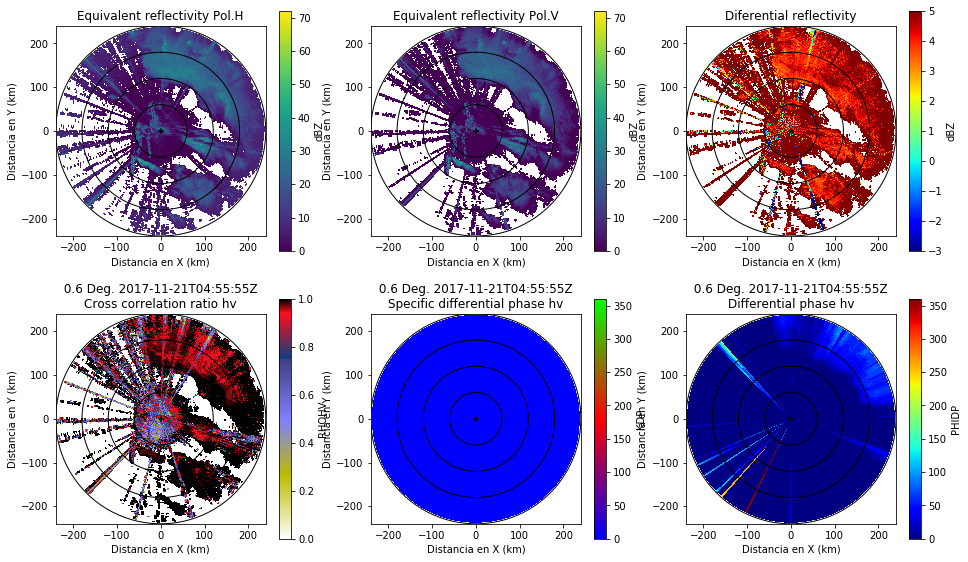

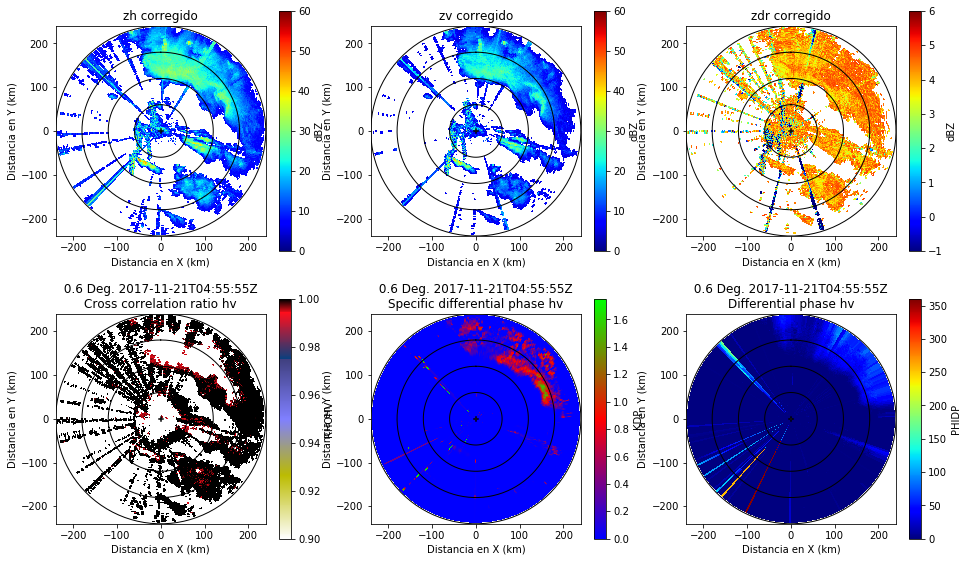

listo


In [ ]:
#CARGAMOS LAS VARIABLES
# REFLECTIVIDAD HORIZONTAL
zh = radar.fields['TH']['data']
# REFLECTIVIDAD VERTICAL
zv = radar.fields['TV']['data']
# REFLECTIVIDAD DIFERENCIAL  
Zdr=zh-zv
#Agregamos al objeto radar ZDR como algo nuevo 
radar.add_field_like('TH','ZDR',Zdr,replace_existing=True)   #like toma los atributos de otra variable que sea semejante
Zdr= radar.fields['ZDR']['data']
# DIFERENCIAL DE FASE ESPECIFICO
kdp = radar.fields['corrected_kdp']['data']
# DIFERENCIAL DE FASE 
phidp = radar.fields['corrected_phidp']['data']
# COEFICIENTE DE CORRELACION
rh = radar.fields['RHOHV']['data']



##################### Visualización de datos: presentación PPI. graficos de cada variable

display = pyart.graph.RadarDisplay(radar)

fig = plt.figure(figsize=(16,15))

xrange  = [-240,240] # En km
yrange  = [-240,240] # En km
anillos = [60,120,180,240] # En km
Rmax=240.0 # En km

# Definimos la elevación de la antena (PPI) a graficar
sweep=0

xlabel = 'Distancia en X (km)'
ylabel = 'Distancia en Y (km)'

# PPI reflectividad horizontal
ax1 = fig.add_subplot(3,3,1,aspect=1.0)
display.plot_ppi('TH',sweep,colorbar_label='dBZ',axislabels=(xlabel,ylabel),vmin=0,vmax=72,title='Equivalent reflectivity Pol.H')
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)
# PPI reflectividad horizontal
ax1 = fig.add_subplot(3,3,2,aspect=1.0)
display.plot_ppi('TV',sweep,colorbar_label='dBZ',axislabels=(xlabel,ylabel),vmin=0,vmax=72,title='Equivalent reflectivity Pol.V')
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)


# PPI reflectividad diferencial (preguntar como graficar porque no lo reconoce como field al Zdr) ##Bias de 3dB aprox
ax1 = fig.add_subplot(3,3,3,aspect=1.0)
display.plot_ppi('ZDR',sweep,colorbar_label='dBZ',axislabels=(xlabel,ylabel),vmin=-3,vmax=5,cmap='jet',title='Diferential reflectivity')
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)


# PPI coeficiente de correlacion
ax1 = fig.add_subplot(3,3,4,aspect=1.0)
display.plot_ppi('RHOHV',sweep,colorbar_label='RHOHV',axislabels=(xlabel,ylabel),cmap='gist_stern_r',vmin=0,vmax=1)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)

# PPI fase diferencial DIFERENCIAL
ax1 = fig.add_subplot(3,3,5,aspect=1.0)
display.plot_ppi('corrected_kdp',sweep,colorbar_label='KDP',axislabels=(xlabel,ylabel),cmap='brg',vmin=0,vmax=360)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)
###en el caso corregido puede ser que por la escala no se vea el cambio de °/km
 #RadarDisplay.set_limits(xlim=None, ylim=None, ax=None)[source]

# PPI fase diferencial 
ax1 = fig.add_subplot(3,3,6,aspect=1.0)
display.plot_ppi('unfolded_differential_phase',sweep,colorbar_label='PHIDP',axislabels=(xlabel,ylabel),cmap='jet',vmin=0,vmax=360)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)
plt.savefig('/home/martin/Escritorio/tpfinal/resultados/variables(16).png')


##################

##################
##posible correccion phv bajos menor a 0.8 aprox y sacar interferencia terreno cerca del radar y posible cierra
#uso numpy masked primero la condicion luego la matriz
#ZDR_sincosas= 
#()&() para dos condiciones con y
# ()|() para dos condiciones con 

#uso numpy masked primero la condicion luego la matriz
#ZDR_enmascarada= 
#()&() para dos condiciones con y
# ()|() para dos condiciones con o
#con esto enmascaro y luego puedo agregar al objeto radar pero sugerencia poner con otro 





zhcor=ma.masked_where(zh <= 7, zh)
#Agregamos al objeto radar ZDR como algo nuevo 
radar.add_field_like('TH','Zhcor',zhcor,replace_existing=True)   #like toma los atributos de otra variable que sea semejante

zvcor=ma.masked_where(zv <= 5, zv)
#Agregamos al objeto radar ZDR como algo nuevo 
radar.add_field_like('TH','Zvcor',zvcor,replace_existing=True)   #like toma los atributos de otra variable que sea semejante


rhcor=ma.masked_where(rh <= 0.995 , rh)
#Agregamos al objeto radar ZDR como algo nuevo 
radar.add_field_like('RHOHV','rhcor',rhcor,replace_existing=True)   #like toma los atributos de otra variable que sea semejante


Zcor=ma.masked_where(Zdr >= 4.9 , Zdr) 
radar.add_field_like('TH','Zdrcor',Zcor,replace_existing=True)
Zdrc= radar.fields['Zdrcor']['data']




display = pyart.graph.RadarDisplay(radar)

fig = plt.figure(figsize=(16,15))

xrange  = [-240,240] # En km
yrange  = [-240,240] # En km
anillos = [60,120,180,240] # En km
Rmax=240.0 # En km

# Definimos la elevación de la antena (PPI) a graficar
sweep=0

xlabel = 'Distancia en X (km)'
ylabel = 'Distancia en Y (km)'

# PPI fase diferencial h 
ax2 = fig.add_subplot(3,3,1,aspect=1.0)
display.plot_ppi('Zhcor',sweep,colorbar_label='dBZ',axislabels=(xlabel,ylabel),cmap='jet', title='zh corregido',vmin=0,vmax=60)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)


# PPI fase diferencial  v
ax2 = fig.add_subplot(3,3,2,aspect=1.0)
display.plot_ppi('Zvcor',sweep,colorbar_label='dBZ',axislabels=(xlabel,ylabel),cmap='jet',title='zv corregido',vmin=0,vmax=60)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)


# PPI reflectividad diferencial  ##Bias de 3dB aprox el radar de cordoba 2017
ax2 = fig.add_subplot(3,3,3,aspect=1.0)
display.plot_ppi('Zdrcor',sweep,colorbar_label='dBZ',axislabels=(xlabel,ylabel),vmin=-1,vmax=6,cmap='jet',title='zdr corregido')
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)


# PPI coeficiente de correlacion
ax2 = fig.add_subplot(3,3,4,aspect=1.0)
display.plot_ppi('rhcor',sweep,colorbar_label='RHOHV',axislabels=(xlabel,ylabel),cmap='gist_stern_r',vmin=0.9,vmax=1)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)

# PPI fase diferencial DIFERENCIAL
ax2 = fig.add_subplot(3,3,5,aspect=1.0)
display.plot_ppi('corrected_kdp',sweep,colorbar_label='KDP',axislabels=(xlabel,ylabel),cmap='brg',vmin=0,vmax=1.75)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)
###en el caso corregido puede ser que por la escala no se vea el cambio de °/km
 #RadarDisplay.set_limits(xlim=None, ylim=None, ax=None)[source]

# PPI fase diferencial 
ax2 = fig.add_subplot(3,3,6,aspect=1.0)
display.plot_ppi('unfolded_differential_phase',sweep,colorbar_label='PHIDP',axislabels=(xlabel,ylabel),cmap='jet',vmin=0,vmax=360)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)
plt.savefig('/home/martin/Escritorio/tpfinal/resultados/variablescorregidas(16).png')




plt.show()

print('listo')

Pero tambien vamos a necesitar los datos del sondeo, en particular, el perfil de temperatura interpolado a la misma estructura que los datos radar. A continuacion se muestra una manera usando Py-ART y `numpy.interp`.

In [ ]:
def get_z_from_radar(radar):
    """Input radar object, return z from radar (km, 2D)"""
    azimuth_1D = radar.azimuth['data']
    elevation_1D = radar.elevation['data']
    srange_1D = radar.range['data']
    sr_2d, az_2d = np.meshgrid(srange_1D, azimuth_1D)
    el_2d = np.meshgrid(srange_1D, elevation_1D)[1]
    xx, yy, zz = antenna_to_cartesian(sr_2d/1000.0, az_2d, el_2d)
    return zz + radar.altitude['data']

def check_sounding_for_montonic(sounding):
    """
    So the sounding interpolation doesn't fail, force the sounding to behave
    monotonically so that z always increases. This eliminates data from
    descending balloons.
    """
    snd_T = sounding.soundingdata['temp']  # In old SkewT, was sounding.data
    snd_z = sounding.soundingdata['hght']  # In old SkewT, was sounding.data
    dummy_z = []
    dummy_T = []
    if not snd_T.mask[0]: #May cause issue for specific soundings
        dummy_z.append(snd_z[0])
        dummy_T.append(snd_T[0])
        for i, height in enumerate(snd_z):
            if i > 0:
                if snd_z[i] > snd_z[i-1] and not snd_T.mask[i]:
                    dummy_z.append(snd_z[i])
                    dummy_T.append(snd_T[i])
        snd_z = np.array(dummy_z)
        snd_T = np.array(dummy_T)
    return snd_T, snd_z

def interpolate_sounding_to_radar(sounding, radar):
    """Takes sounding data and interpolates it to every radar gate."""
    radar_z = get_z_from_radar(radar)
    radar_T = None
    snd_T, snd_z = check_sounding_for_montonic(sounding)
    shape = np.shape(radar_z)
    rad_z1d = radar_z.ravel()
    rad_T1d = np.interp(rad_z1d, snd_z, snd_T)
    return np.reshape(rad_T1d, shape), radar_z

radar_T, radar_z = interpolate_sounding_to_radar(sounding, radar)

## 3. Clasificacion de hidrometeoros

In [ ]:
scores = csu_fhc.csu_fhc_summer(dz=zhcor, zdr=Zdrc, rho=rhcor, kdp=kdp, use_temp=True, band='C', T=radar_T)
fh = np.argmax(scores, axis=0) + 1


# Here's help to see what else you can do with csu_fhc.csu_fhc_summer
help(csu_fhc.csu_fhc_summer)

Help on function csu_fhc_summer in module csu_radartools.csu_fhc:

csu_fhc_summer(use_temp=True, weights={'DR': 0.8, 'DZ': 1.5, 'KD': 1.0, 'LD': 0.5, 'RH': 0.8, 'T': 0.4}, method='hybrid', dz=None, zdr=None, ldr=None, kdp=None, rho=None, T=None, verbose=False, plot_flag=False, n_types=10, temp_factor=1, band='S')
    Does FHC for warm-season precip.
    
    Arguments:
    use_temp = Set to False to not use T in HID
    weights = Dict that contains relative weights for every variable; see
              DEFAULT_WEIGHTS for expected stucture
    method = Currently support 'hybrid' or 'linear' methods; hybrid preferred
    verbose = Set to True to get text updates
    plot_flag = Flag to turn on optional beta function plots
    band = 'X', 'C', or 'S'
    temp_factor = Factor to modify depth of T effects; > 1 will broaden the
                  slopes of T MBFs
    n_types = Number of hydrometeor species
    verbose = Set to True to get text updates
    
    Input measurands (if not None, 

Para habilitar la habilidad de encontrar la segunda especie clasificada (o tercera, etc.), `csu_fhc_summer` devuelve las puntuaciones para todas las diferentes categorías, no sólo el máximo. Asi que para obtener el numero de categoria HID tradicional hay que usar `numpy.argmax` como esta arriba. El algoritmo HID para verano devuelve 10 posibles categorias:
<ul>
<li>1. Drizzle</li>
<li>2. Rain</li>
<li>3. Ice Crystals</li>
<li>4. Aggregates</li>
<li>5. Wet/Melting Snow</li>
<li>6. Vertically Aligned Ice</li>
<li>7. Low-Density Graupel</li>
<li>8. High-Density Graupel</li>
<li>9. Hail</li>
<li>10. Big Drops</li>
</ul>

Y las mismas estan representadas como valores enteros dentro del array `fh`, que tiene la misma estructura que `dz`, `dr`, etc. 
And these are represented as integers in the newly created `fh` array, which as the same structure as `dz`, `dr`, etc. Nos gustaría dibujar estos datos usando Py-ART, lo que significa que necesitamos activar `fh` en un campo de objetos de radar. Vamos a hacer eso.

In [ ]:
def add_field_to_radar_object(field, radar, field_name='FH', units='unitless', 
                              long_name='Hydrometeor ID', standard_name='Hydrometeor ID',
                              dz_field='Zhcor'):
    """
    Adds a newly created field to the Py-ART radar object. If reflectivity is a masked array,
    make the new field masked the same as reflectivity.
    """
    fill_value = -32768
    masked_field = np.ma.asanyarray(field)
    masked_field.mask = masked_field == fill_value
    if hasattr(radar.fields[dz_field]['data'], 'mask'):
        setattr(masked_field, 'mask', 
                np.logical_or(masked_field.mask, radar.fields[dz_field]['data'].mask))
        fill_value = radar.fields[dz_field]['_FillValue']
    field_dict = {'data': masked_field,
                  'units': units,
                  'long_name': long_name,
                  'standard_name': standard_name,
                  '_FillValue': fill_value}
    radar.add_field(field_name, field_dict, replace_existing=True)
    return radar

In [ ]:
radar = add_field_to_radar_object(fh, radar)

## 4. Visualizacion PPI
Y ahora vamos a graficarlo! Primero, sin embargo, vamos a corregir la barra de color de Py-ART para que sea mas acorde para el producto HID.

In [ ]:
hid_colors = ['White', 'LightBlue', 'MediumBlue', 'DarkOrange', 'LightPink',
              'Cyan', 'DarkGray', 'Lime', 'Yellow', 'Red', 'Fuchsia']
cmaphid = colors.ListedColormap(hid_colors)
cmapmeth = colors.ListedColormap(hid_colors[0:6])
cmapmeth_trop = colors.ListedColormap(hid_colors[0:7])

def adjust_fhc_colorbar_for_pyart(cb):
    cb.set_ticks(np.arange(1.4, 10, 0.9))
    cb.ax.set_yticklabels(['Drizzle', 'Rain', 'Ice Crystals', 'Aggregates',
                           'Wet Snow', 'Vertical Ice', 'LD Graupel',
                           'HD Graupel', 'Hail', 'Big Drops'])
    cb.ax.set_ylabel('')
    cb.ax.tick_params(length=0)
    return cb

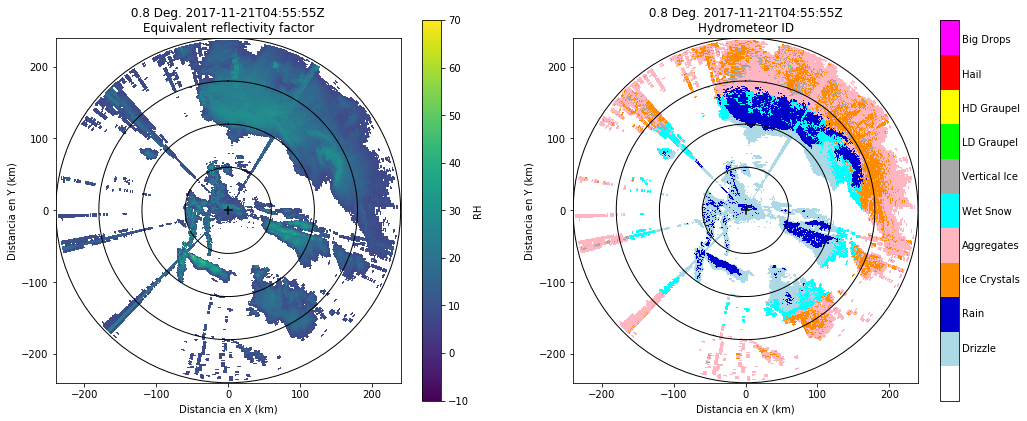

In [ ]:
display = pyart.graph.RadarDisplay(radar)

fig = plt.figure(figsize=(17,7))

xrange  = [-240,240] # En km
yrange  = [-240,240] # En km
anillos = [60,120,180,240] # En km
Rmax=240.0 # En km

# Definimos la elevación de la antena (PPI) a graficar
sweep=1

xlabel = 'Distancia en X (km)'
ylabel = 'Distancia en Y (km)'

# PPI reflectividad horizontal
ax1 = fig.add_subplot(1,2,1,aspect=1.0)
display.plot_ppi('Zhcor',sweep,colorbar_label='RH',axislabels=(xlabel,ylabel),vmin=-10,vmax=70)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)

# PPI reflectividad horizontal
ax1 = fig.add_subplot(1,2,2,aspect=1.0)
display.plot_ppi('FH',sweep,axislabels=(xlabel,ylabel),cmap=cmaphid,vmin=0,vmax=10)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)
display.cbs[1] = adjust_fhc_colorbar_for_pyart(display.cbs[1])
plt.savefig('/home/martin/Escritorio/tpfinal/resultados/HID(16).png')
plt.show()


## 5. Cortes verticales

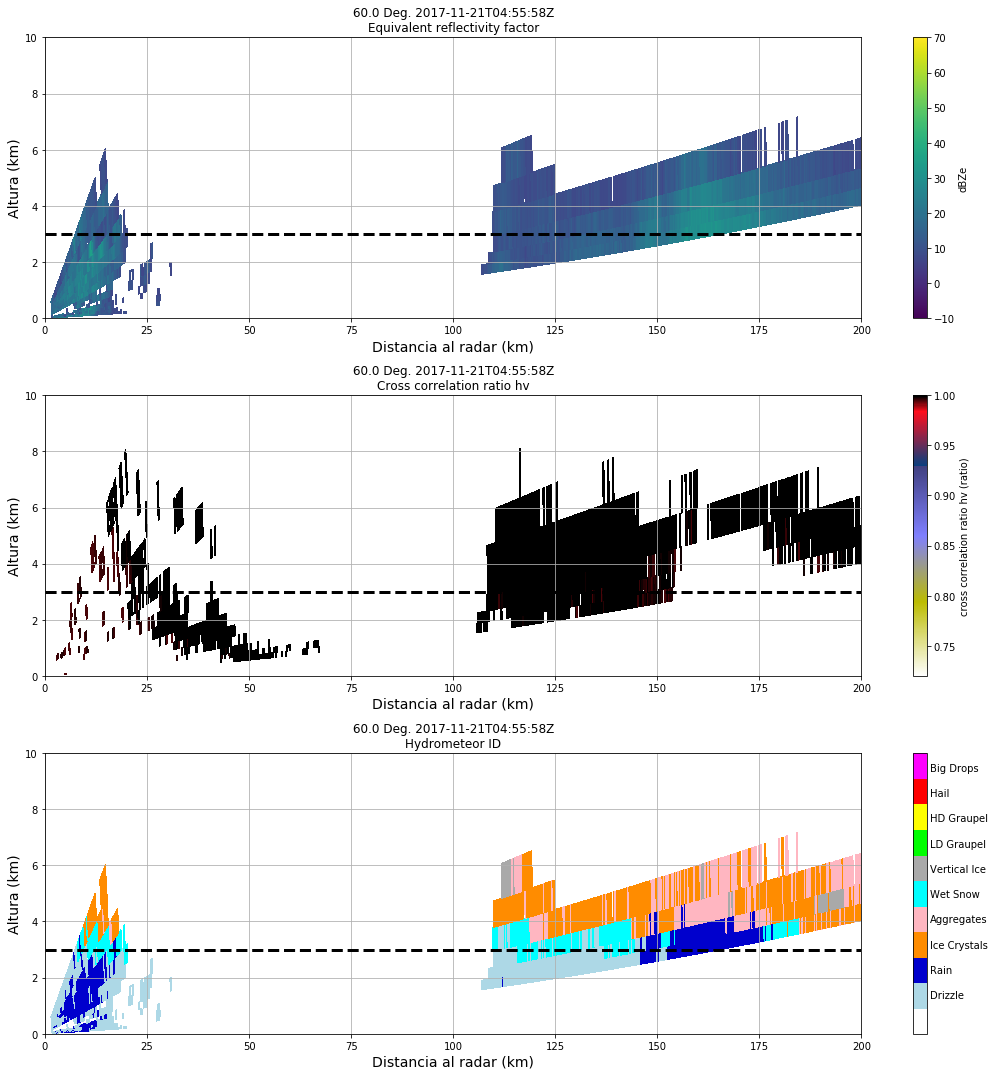

In [ ]:
# Direccion a lo largo de la cual realizar el corte vertical
radial=60

# Altura isoterma de cero grados se considera apartir del sondeo observado en codoba a las 00Z del 20 de Noviembre del 2017
# 3868metros

H0deg=3,868


xsect = pyart.util.cross_section_ppi(radar, [radial])

display = pyart.graph.RadarDisplay(xsect)

fig = plt.figure(figsize=[15,15])

# REFLECTIVIDAD HORIZONTAL
ax = fig.add_subplot(311)
display.plot('Zhcor', 0, vmin=-10., vmax=70., colorbar_label='dBZe')
display.set_limits(xlim=(0, 200), ylim=(0, 10))
plt.tight_layout()
plt.plot([0,200],[H0deg,H0deg],'--k', lw=3)
plt.xlabel('Distancia al radar (km)',fontsize=14)
plt.ylabel('Altura (km)',fontsize=14)
plt.grid()

# COEFICIENTE DE CORRELACION
ax = fig.add_subplot(312)
display.plot('rhcor', 0, cmap='gist_stern_r', vmin=0.72, vmax=1)
display.set_limits(xlim=(0, 200), ylim=(0, 10))
plt.tight_layout()
plt.plot([0,200],[H0deg,H0deg],'--k', lw=3)
plt.xlabel('Distancia al radar (km)',fontsize=14)
plt.ylabel('Altura (km)',fontsize=14)
plt.grid()

# PRODUCTO HID
ax = fig.add_subplot(313)
display.plot('FH', 0, cmap=cmaphid, vmin=0, vmax=10)
display.set_limits(xlim=(0, 200), ylim=(0, 10))
plt.tight_layout()
plt.plot([0,200],[H0deg,H0deg],'--k', lw=3)
plt.xlabel('Distancia al radar (km)',fontsize=14)
plt.ylabel('Altura (km)',fontsize=14)
plt.grid()
display.cbs[2] = adjust_fhc_colorbar_for_pyart(display.cbs[2])

plt.savefig('/home/martin/Escritorio/tpfinal/resultados/RHI(16).png')
plt.show()

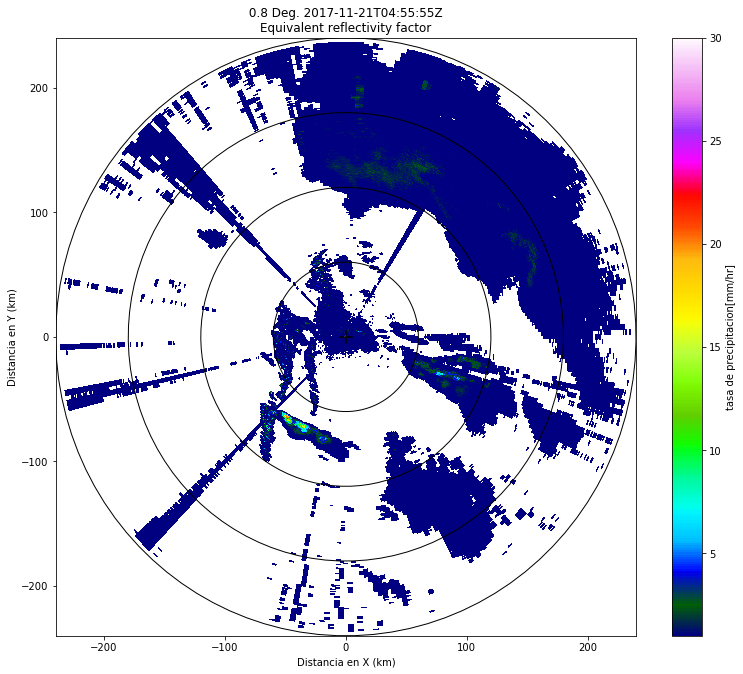

In [ ]:
# b) Calculo de precipitacion mediante relacion Z-R
# Parametros a y b de la relacion Z=a*R^b
#nelev=0
##############METODO Vidal Estratiforme
a1=363.3
b1=1.63
Z1=10.0**(zhcor/10.0)
R1= (Z1/a1)**(1.0/b1)

#Agregamos al objeto radar ZDR como algo nuevo 
radar.add_field_like('TH','R1',R1,replace_existing=True)   #like toma los atributos de otra variable que sea semejante

##############METODO Vidal Estratiforme+Convectivo=total
a2=360.8
b2=1.57
Z2=10.0**(zhcor/10.0)
R2= (Z2/a2)**(1.0/b2)

#Agregamos al objeto radar ZDR como algo nuevo 
radar.add_field_like('TH','R2',R2,replace_existing=True)   #like toma los atributos de otra variable que sea semejante

###########################################################



display = pyart.graph.RadarDisplay(radar)

fig = plt.figure(figsize=(13,11))

xrange  = [-240,240] # En km
yrange  = [-240,240] # En km
anillos = [60,120,180,240] # En km
Rmax=240.0 # En km

# Definimos la elevación de la antena (PPI) a graficar
sweep=1

xlabel = 'Distancia en X (km)'
ylabel = 'Distancia en Y (km)'

# PPI V1
display.plot_ppi('R1',sweep,colorbar_label='tasa de precipitacion[mm/hr]',axislabels=(xlabel,ylabel),cmap='gist_ncar',vmin=1,vmax=30)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)
plt.savefig('/home/martin/Escritorio/tpfinal/resultados/QPEEstratiforme(16).png')

plt.show()


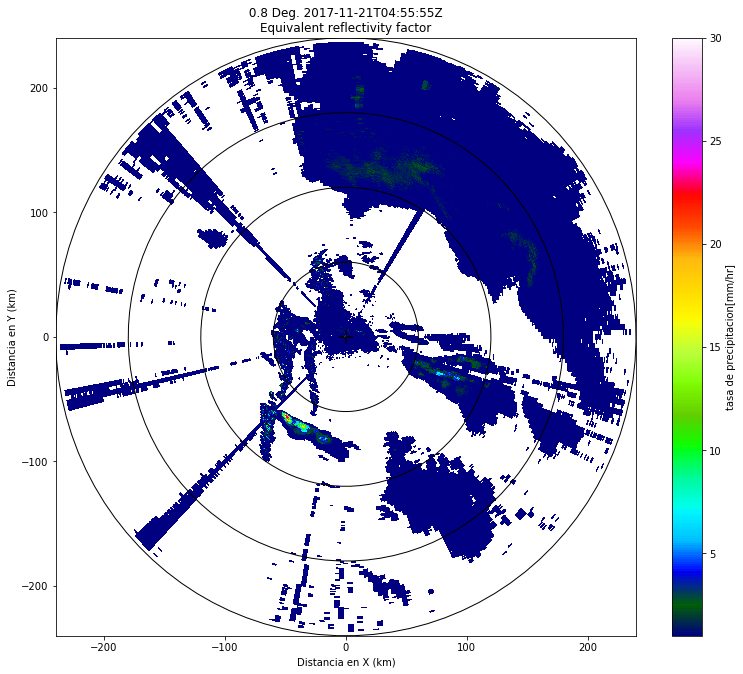

In [ ]:

display = pyart.graph.RadarDisplay(radar)

fig = plt.figure(figsize=(13,11))

xrange  = [-240,240] # En km
yrange  = [-240,240] # En km
anillos = [60,120,180,240] # En km
Rmax=240.0 # En km

# Definimos la elevación de la antena (PPI) a graficar
sweep=1

xlabel = 'Distancia en X (km)'
ylabel = 'Distancia en Y (km)'

# PPI V1
display.plot_ppi('R2',sweep,colorbar_label='tasa de precipitacion[mm/hr]',axislabels=(xlabel,ylabel),cmap='gist_ncar',vmin=1,vmax=30)
display.plot_range_rings(anillos,lw=1.0)
display.set_limits(xrange,yrange)
display.plot_cross_hair(5.)
plt.savefig('/home/martin/Escritorio/tpfinal/resultados/QPEtotal(16).png')


